Text(0, 0.5, 'Availability of air conditioning')

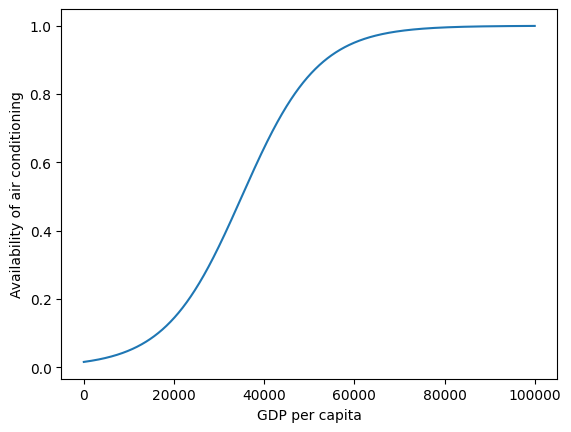

In [12]:
import numpy as np
import matplotlib.pyplot as plt

gdp = np.linspace(0, 100000, 1000)
# Factor 0.5 between 1995 USD and 2020 USD
avail = 1/(1+np.exp(4.152)*np.exp(-0.237*0.5*gdp/1000))

plt.plot(gdp, avail)
plt.xlabel('GDP per capita')
plt.ylabel('Availability of air conditioning')

(0.0, 1.0)

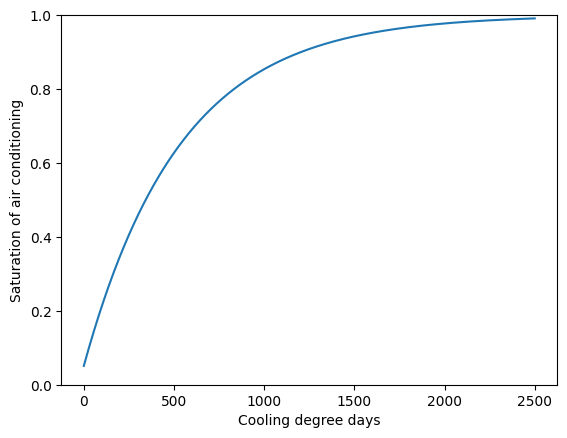

In [13]:
cdd_x = np.linspace(0, 2500, 1000)
def sat(cdd):
    return (1.00 - 0.949*np.exp(-0.00187*cdd))
plt.plot(cdd_x, sat(cdd_x))
plt.xlabel('Cooling degree days')
plt.ylabel('Saturation of air conditioning')
plt.ylim(0, 1.)

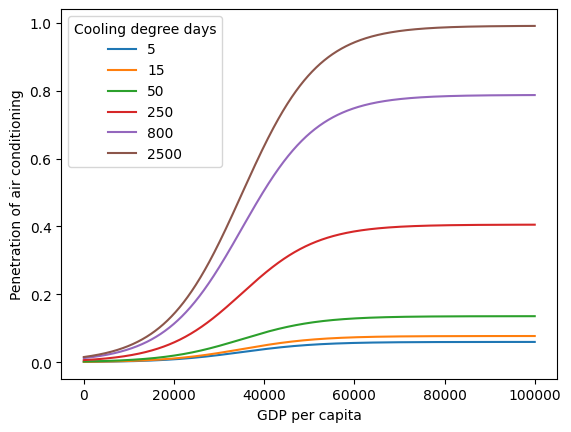

In [14]:
# Show penetration of air conditioning as a function of GDP per capita for different cooling degree days
plt.figure()
for cdd in [5, 15, 50, 250, 800, 2500]:
    plt.plot(gdp, avail*sat(cdd), label=str(cdd))
plt.xlabel('GDP per capita')
plt.ylabel('Penetration of air conditioning')
plt.legend(title='Cooling degree days')
